# Homework 1

Consider the one-way wave equation

\begin{equation}
u_t+u_x = 0, \quad x\in [-1,3], t\in[0,2.4]
\end{equation}

with initial condition

\begin{equation}
u(x,0) = \begin{cases}
      \cos^2(\pi x) & \text{if}\ |x|\leq \frac{1}{2}\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}
and the boundary condition $u(t,-1)=0$.

Use the following four schemes for $h=1/10, 1/20$ and $1/40$ to solve the problem.

In [ ]:
# Initial call for required packages
import numpy as np # for mathematical operations
import matplotlib.pyplot as plt # for plotting

def init_space(x):
    """
    Enforce conditional about the initial boundary condition
    for space, common for all problems
    """
    
    if np.abs(x) <= 1./2:
        return (np.cos(np.pi*x))**2
    else:
        return 0.
    
def final_space(x, t):
    """
    Gives final solution for the one-way transport equation
    """
    
    return init_space(x - t)

## Problem 1 Code (FTBS scheme with $\lambda=0.8$)

The forward time backward space scheme is described by
\begin{equation}
\frac{v_m^{n+1} - v_m^n}{k} + \frac{v_m^n - v_{m-1}^n}{h} = 0
\end{equation}
We can rewrite this as,
\begin{equation}
v_m^{n+1} = v_m^n - \lambda(v_m^n - v_{m-1}^n) = (1-\lambda)v_m^n + \lambda v_{m-1}^n
\end{equation}

Shown below is a Python implementation of the FTBS scheme.

In [ ]:
def ftbs(xleft, xright, T, h, k):
    """
    Solves the one way wave equation ut + ux = 0 with speed of propagation a = 1
    with boundaries along x xleft and xright, and end time T
    
    Forward time backward space
    
    h mesh in space (dx)
    k step in time (dt)
    lambda = k/h
    """
    
    # number of intervals along the x direction : m
    m = np.ceil((xright - xleft)/h)
    # number of intervals along the t direction : n
    n = np.ceil(T/k)
    
    n = int(n)
    m = int(m)
    
    # We have to adjust the mesh size |0  |1  |2  |<- 3 subintervals
    #                                |<-(xr-xl)->|
    #                                |    | <- mesh size is (xright-xleft)/m 
    #                                |    | <- step size is (tfinal-tinit)/n
    
    hnew = (xright - xleft)/m
    knew = T/n
    
    lamb = knew / hnew
    
    # We will incorporate Prof Bo Dong's procedure for time marching
    prev_time = 0
    next_time = 1
    
    # Initialize the mesh 
    xgrid = np.arange(xleft, xright, hnew)
    
    # Initialize 2 x hnew array to store previous and current time
    solution = np.zeros((2,int(m)))
    
    # Feed initial data
    solution[prev_time,:] = np.array([init_space(x) for x in xgrid])
    
    for i in range(n-1):
        for j in range(m-1):
            solution[next_time, j] = (1 - lamb)*solution[prev_time, j] + lamb*solution[prev_time, j-1]
        solution[next_time, 0] = 0.
        
        hold = prev_time
        prev_time = next_time
        next_time = hold
        
    final_solution = solution[prev_time, :]
    
    # Say we use k = 0.1 and h = 0.125 such that k/h = 0.8
    plt.scatter(xgrid,final_solution, color = 'red',s=4, label='approx. solution')
    
    xgrd = np.linspace(xleft, xright)
    # Initial solution
    plt.plot(xgrd, [init_space(x) for x in xgrd],label='init. solution')
    # Final solution
    plt.plot(xgrd, [final_space(x, T) for x in xgrd], label = 'final solution')
    plt.title(r'FTBS scheme for $\lambda=$%.1f' % (k/h)+' and $h=$'+str(h))
    plt.legend()

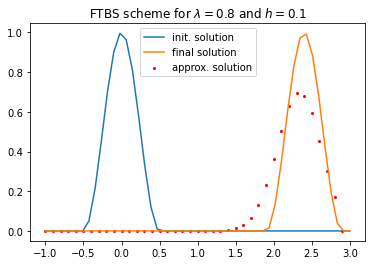

In [ ]:
ftbs(-1, 3, 2.4, 0.1, 0.08)

The approximate solution does not seem to accurately depict the actual solution at $T=2.4$. The shape of the approximation solution roughly follows the actual solution. However, we will see that as we refine the mesh, it will approach the exact solution.

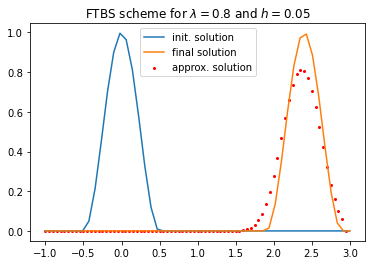

In [ ]:
ftbs(-1, 3, 2.4, 0.05, 0.04)

Changing the mesh size to half the first $h$ we chose gave a better approximation. As we progressively divide the finest resolution, we continue to approach the exact solution.

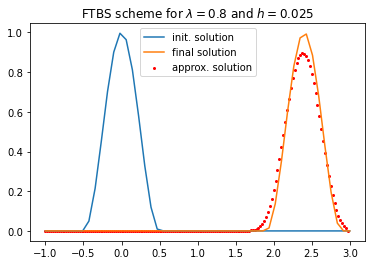

In [ ]:
ftbs(-1, 3, 2.4, 0.025, 0.02)

To demonstrate convergence, we consider a very small $h=1\times 10^{-3}$.

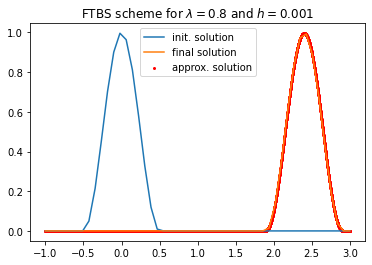

In [ ]:
ftbs(-1, 3, 2.4, 0.001, 0.0008)

## Problem 2 Code (FTCS scheme with $\lambda=0.8$)

The forward time central space scheme is described by
\begin{equation}
\frac{v_m^{n+1} - v_m^n}{k} + \frac{v_{m+1}^n - v_{m-1}^n}{2h} = 0
\end{equation}
We can rewrite this as,
\begin{equation}
v_m^{n+1} = v_m^n - \frac{\lambda}{2}(v_{m+1}^n - v_{m-1}^n) 
\end{equation}

Shown below is a Python implementation of the FTCS scheme.

In [ ]:
def ftcs(xleft, xright, T, h, k):
    """
    Solves the one way wave equation ut + ux = 0 with speed of propagation a = 1
    with boundaries along x xleft and xright, and end time T
    
    Forward time central space
    
    h mesh in space (dx)
    k step in time (dt)
    lambda = k/h
    """
    
    # number of intervals along the x direction : m
    m = np.ceil((xright - xleft)/h)
    # number of intervals along the t direction : n
    n = np.ceil(T/k)
    
    n = int(n)
    m = int(m)
    
    # We have to adjust the mesh size |0  |1  |2  |<- 3 subintervals
    #                                |<-(xr-xl)->|
    #                                |    | <- mesh size is (xright-xleft)/m 
    #                                |    | <- step size is (tfinal-tinit)/n
    
    hnew = (xright - xleft)/m
    knew = T/n
    
    lamb = knew / hnew
    
    # We will incorporate Prof Bo Dong's procedure for time marching
    prev_time = 0
    next_time = 1
    
    # Initialize the mesh 
    xgrid = np.arange(xleft, xright, hnew)
    
    # Initialize 2 x hnew array to store previous and current time
    solution = np.zeros((2,int(m)))
    
    # Feed initial data
    solution[prev_time,:] = np.array([init_space(x) for x in xgrid])
    
    for i in range(n-1):
        for j in range(m-1):
            solution[next_time, j] = solution[prev_time, j] - (lamb/2)*(solution[prev_time, j+1]-solution[prev_time, j-1])
        solution[next_time, 0] = 0.
        solution[next_time, m-1] = solution[next_time, m-2]
        
        hold = prev_time
        prev_time = next_time
        next_time = hold
        
    final_solution = solution[prev_time, :]
    
    plt.scatter(xgrid,final_solution, color = 'red',s=4, label='approx. solution')
    
    xgrd = np.linspace(xleft, xright)
    # Initial solution
    plt.plot(xgrd, [init_space(x) for x in xgrd],label='init. solution')
    # Final solution
    plt.plot(xgrd, [final_space(x, T) for x in xgrd], label = 'final solution')
    plt.title(r'FTCS scheme for $\lambda=$%.1f' % (k/h)+' and $h=$'+str(h))
    plt.legend()

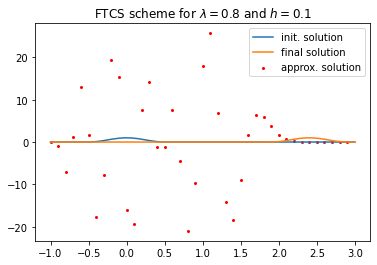

In [ ]:
ftcs(-1, 3, 2.4, 0.1, 0.08)

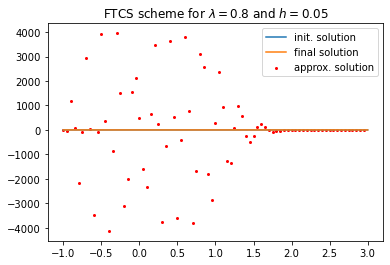

In [ ]:
ftcs(-1, 3, 2.4, 0.05, 0.04)

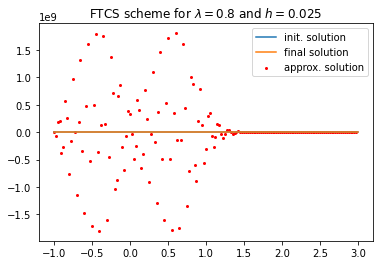

In [ ]:
ftcs(-1., 3., 2.4, 0.025, 0.02)

We see that in any choice for the mesh size, the FTCS scheme for the one-way transport equation is inherently unstable.

## Problem 3 Code (Lax-Friedrichs scheme with $\lambda=0.8$ and $\lambda=1.6$)

The Lax-Friedrichs scheme is described by
\begin{equation}
\frac{v_m^{n+1} - \frac{1}{2}(v_{m+1}^n+ v_{m-1}^n)}{k} + \frac{v_{m+1}^n - v_{m-1}^n}{2h} = 0
\end{equation}
We can rewrite this as,
\begin{equation}
v_m^{n+1} = \frac{1}{2}(v_{m+1}^n+ v_{m-1}^n) - \frac{\lambda}{2}(v_{m+1}^n - v_{m-1}^n)=\frac{1}{2}(1-\lambda)v_{m+1}^n + \frac{1}{2}(1+\lambda)v_{m-1}^n
\end{equation}

Shown below is a Python implementation of the LF scheme.

In [ ]:
def laxfrd(xleft, xright, T, h, k):
    """
    Solves the one way wave equation ut + ux = 0 with speed of propagation a = 1
    with boundaries along x xleft and xright, and end time T
    
    Lax Friedrichs
    
    h mesh in space (dx)
    k step in time (dt)
    lambda = k/h
    """
    
    # number of intervals along the x direction : m
    m = np.ceil((xright - xleft)/h)
    # number of intervals along the t direction : n
    n = np.ceil(T/k)
    
    n = int(n)
    m = int(m)
    
    # We have to adjust the mesh size |0  |1  |2  |<- 3 subintervals
    #                                |<-(xr-xl)->|
    #                                |    | <- mesh size is (xright-xleft)/m 
    #                                |    | <- step size is (tfinal-tinit)/n
    
    hnew = (xright - xleft)/m
    knew = T/n
    
    lamb = knew / hnew
    
    # We will incorporate Prof Bo Dong's procedure for time marching
    prev_time = 0
    next_time = 1
    
    # Initialize the mesh 
    xgrid = np.arange(xleft, xright, hnew)
    
    # Initialize 2 x hnew array to store previous and current time
    solution = np.zeros((2,int(m)))
    
    # Feed initial data
    solution[prev_time,:] = np.array([init_space(x) for x in xgrid])
    
    for i in range(n-1):
        for j in range(m-1):
            solution[next_time, j] = (1/2)*(1-lamb)*solution[prev_time, j+1] + (1/2)*(1+lamb)*solution[prev_time, j-1]
        solution[next_time, 0] = 0.
        solution[next_time, m-1] = solution[next_time, m-2]
        
        hold = prev_time
        prev_time = next_time
        next_time = hold
        
    final_solution = solution[prev_time, :]
    
    plt.scatter(xgrid,final_solution, color = 'red',s=4, label='approx. solution')
    
    xgrd = np.linspace(xleft, xright)
    # Initial solution
    plt.plot(xgrd, [init_space(x) for x in xgrd],label='init. solution')
    # Final solution
    plt.plot(xgrd, [final_space(x, T) for x in xgrd], label = 'final solution')
    plt.title(r'Lax-Friedrichs scheme for $\lambda=$%.1f' % (k/h)+' and $h=$'+str(h))
    plt.legend()

### Lax-Friedrichs scheme for $\lambda=0.8$

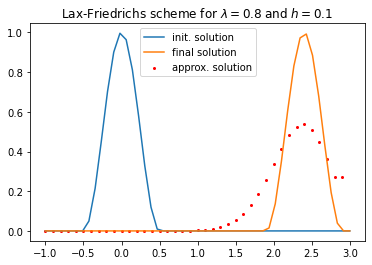

In [ ]:
laxfrd(-1, 3, 2.4, 0.1, 0.08)

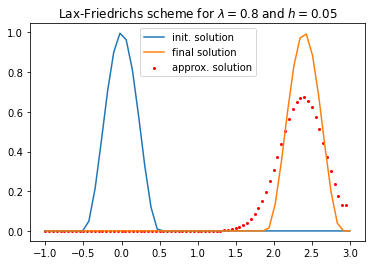

In [ ]:
laxfrd(-1, 3, 2.4, 0.05, 0.04)

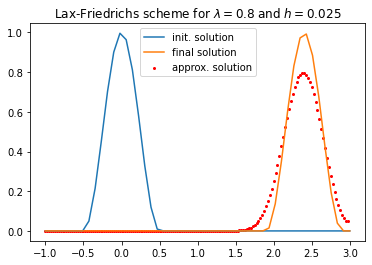

In [ ]:
laxfrd(-1, 3, 2.4, 0.025, 0.02)

The Lax-Friedrichs scheme for $\lambda=0.8$ converges, and gives an approximate solution that could approach to the exact solution. We can further decrease the mesh size to show this convergence, $h=10^{-3}$

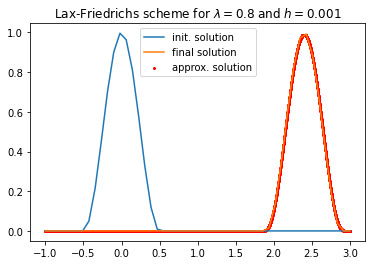

In [ ]:
laxfrd(-1, 3, 2.4, 0.001, 0.0008)

### Lax-Friedrichs scheme for $\lambda=1.6$

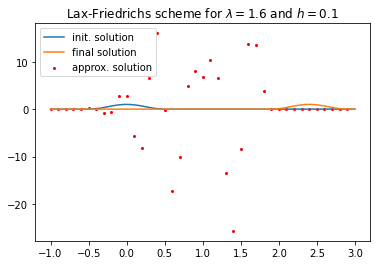

In [ ]:
laxfrd(-1, 3, 2.4, 0.1, 0.16)

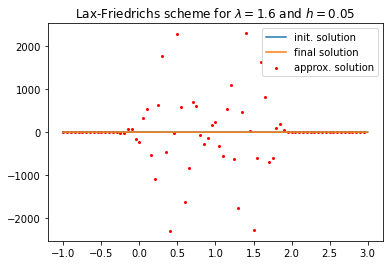

In [ ]:
laxfrd(-1, 3, 2.4, 0.05, 0.08)

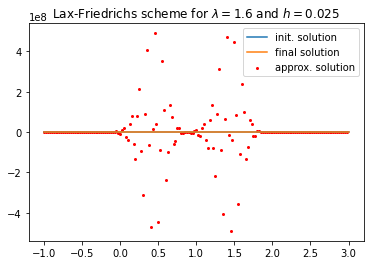

In [ ]:
laxfrd(-1, 3, 2.4, 0.025, 0.04)

We observe that the Lax-Friedrichs scheme does not converge for $a=1$ and $\lambda =1.6$ which we will see in a later item, is consistent with the stability criterion we discussed in class.

## Problem 4 Code (Leapfrog scheme with $\lambda =0.8$)

Unlike the previous schemes explored in the previous items, the Leapfrog method is a 2-step scheme that uses two timesteps (previous and current) to compute for the next timestep. Hence, we will use the FTBS scheme we defined earlier for our first timestep march, and then use Leapfrog for the rest. This gives us an order-1 accuracy for our result. The Leapfrog scheme is described by
\begin{equation}
\frac{v_m^{n+1} - v_m^{n-1}}{2k} + \frac{v_{m+1}^n - v_{m-1}^n}{2h} = 0
\end{equation}
We can rewrite this as,
\begin{equation}
v_m^{n+1} = v_m^{n-1}- \lambda(v_{m+1}^n - v_{m-1}^n) 
\end{equation}

In [ ]:
def leap(xleft, xright, T, h, k):
    """
    Solves the one way wave equation ut + ux = 0 with speed of propagation a = 1
    with boundaries along x xleft and xright, and end time T
    
    Lax Friedrichs
    
    h mesh in space (dx)
    k step in time (dt)
    lambda = k/h
    """
    
    # number of intervals along the x direction : m
    m = np.ceil((xright - xleft)/h)
    # number of intervals along the t direction : n
    n = np.ceil(T/k)
    
    n = int(n)
    m = int(m)
    
    # We have to adjust the mesh size |0  |1  |2  |<- 3 subintervals
    #                                |<-(xr-xl)->|
    #                                |    | <- mesh size is (xright-xleft)/m 
    #                                |    | <- step size is (tfinal-tinit)/n
    
    hnew = (xright - xleft)/m
    knew = T/n
    
    lamb = knew / hnew
    
    # Initialize the mesh 
    xgrid = np.arange(xleft, xright, hnew)
    
    # Initialize 2 x hnew array to store previous and current time
    solution = np.zeros((3,int(m)))
    
    # Feed initial data
    solution[0,:] = np.array([init_space(x) for x in xgrid])
    
    # First march using FTBS
    for j in range(m-1):
        solution[1,j] = (1 - lamb)*solution[0, j] + lamb*solution[0, j-1]
          
    # Leapfrog proper
    counter = [[0,1,2], [1,2,0], [2,0,1]]
    icount = 0
    
    for i in range(n-1):
        prev_time, current_time, next_time = counter[icount]
        for j in range(m-1):
            solution[next_time, j] = solution[prev_time, j] - lamb*(solution[current_time, j+1]-solution[current_time, j-1])
        solution[next_time, 0] = 0.0
        solution[next_time, m-1] = solution[next_time, m-2]
        
        if icount == 2:
            icount = 0 
        else:
            icount = icount + 1
        
    final_solution = solution[1, :]  

    plt.scatter(xgrid,final_solution, color = 'red',s=4, label='approx. solution')
    
    xgrd = np.linspace(xleft, xright)
    # Initial solution
    plt.plot(xgrd, [init_space(x) for x in xgrd],label='init. solution')
    # Final solution
    plt.plot(xgrd, [final_space(x, T) for x in xgrd], label = 'final solution')
    plt.title(r'Leapfrog scheme for $\lambda=$%.1f' % (k/h)+' and $h=$'+str(h))
    plt.legend()

### Leapfrog scheme for $\lambda=0.8$

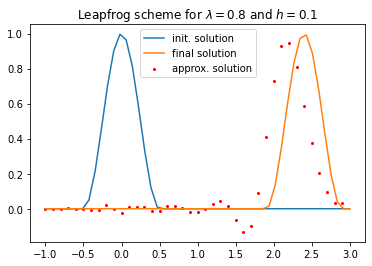

In [ ]:
leap(-1, 3, 2.4, 0.1, 0.08)

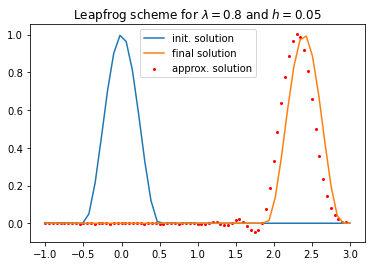

In [ ]:
leap(-1, 3, 2.4, 0.05, 0.04)

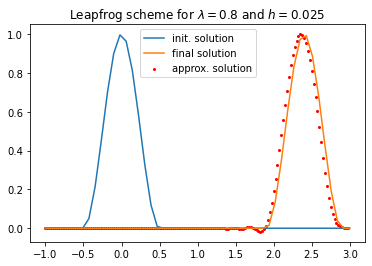

In [ ]:
leap(-1, 3, 2.4, 0.025, 0.02)

The Leapfrog scheme for $\lambda=0.8$ converges, and gives an approximate solution that could approach to the exact solution. We can further decrease the mesh size to show this convergence, $h=10^{-3}$

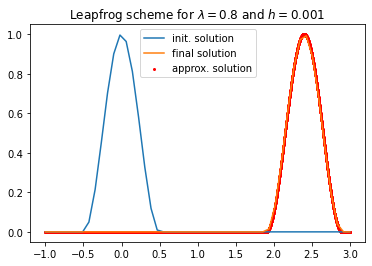

In [ ]:
leap(-1, 3, 2.4, 0.001, 0.0008)

## Problem 5 Consistency

Show that the FTCS scheme is consistent with the equation $u_t + au_x = 0$

**Proof** For any smooth function $\phi(t,x)$, the one-way transport equation can be written  as
\begin{equation}
P\phi = \partial_t \phi + a \partial_x\phi=0
\end{equation}
which correspond to a corresponding difference operator for the forward-time central-space scheme,
\begin{equation}
P_{h,k} \phi = \frac{\phi^{n+1}_m-\phi^n_m}{k} + a\frac{\phi^n_{m+1}-\phi^n_{m-1}}{2h}  
\end{equation}
Here, the solutions $\phi^{n+1}_m$, $\phi^n_m$, $\phi^n_{m+1}$, and $\phi^n_{m-1}$ can be Taylor expanded up to linear order in $h$ and $k$
\begin{equation}
\phi^{n}_m = \phi(t_n, x_m) 
\end{equation}
\begin{equation}
\phi^{n+1}_m = \phi(t_n+k, x_m) = \phi(t_n, x_m) + \partial_t\phi(t_n, x_m) k + \frac{k^2}{2!} \partial_t^2\phi(t_n, x_m) +\mathcal{O}(k^3)
\end{equation}
\begin{equation}
\phi^{n}_{m+1} = \phi(t_n, x_m+h)= \phi(t_n, x_m+h) = \phi(t_n, x_m) + \partial_x\phi(t_n, x_m) h + \frac{h^2}{2!} \partial_x^2\phi(t_n, x_m) +\mathcal{O}(h^3)
\end{equation}
\begin{equation}
\phi^{n}_{m-1} = \phi(t_n, x_m-h) = \phi(t_n, x_m) - \partial_x\phi(t_n, x_m) h + \frac{h^2}{2!} \partial_x^2\phi(t_n, x_m) +\mathcal{O}(h^3)
\end{equation}
Such that we can rewrite the FTCS scheme as, 
\begin{align}
P_{h,k} \phi &= \frac{\phi(t_n, x_m) + \partial_t\phi(t_n, x_m) k + \frac{k^2}{2!} \partial_t^2\phi(t_n, x_m) +\mathcal{O}(k^3) - \phi(t_n, x_m)}{k} \\&+ a \frac{\phi(t_n, x_m) + \partial_x\phi(t_n, x_m) h + \frac{h^2}{2!} \partial_x^2\phi(t_n, x_m) +\mathcal{O}(h^3) - (\phi(t_n, x_m) - \partial_x\phi(t_n, x_m) h + \frac{h^2}{2!} \partial_x^2\phi(t_n, x_m) +\mathcal{O}(h^3))}{2h}=0
\end{align}
which we can simplify to obtain, 
\begin{equation}
P_{h,k} \phi = (\phi_t)_m^n + \frac{k}{2}(\phi_{tt})^n_m +\mathcal{O}(k^2) + a\partial_x\phi(t_n, x_m)=0
\end{equation}
where we see that as $k\to 0$,
\begin{equation}
P_{h,k} \phi = (\phi_t)_m^n + a\partial_x\phi(t_n, x_m)=0
\end{equation}
the approximation approaches the actual one-way transport equation $u_t + a u_x = 0$. Hence, we have shown that the FTCS scheme is consistent for the one-way transport equation.



## Problem 6 Stability 
Show that the schemes of the form

\begin{equation}
v_m^{n+1}=\alpha v_{m+1}^n + \beta v_{m-1}^n
\end{equation}

are stable if $|\alpha|+|\beta|\leq 1$. Conclude that the Lax-Friedrichs scheme is stable if $|a\lambda|\leq 1$.

**Proof** We start the proof by taking the squared norm of both sides of the equation above and expand,
\begin{equation}
|v_m^{n+1}|^2=|\alpha v_{m+1}^n + \beta v_{m-1}^n|^2 = |\alpha^2 (v_{m+1}^n)^2 + \beta^2 (v_{m-1}^n)^2 + 2\alpha\beta v_{m+1}^nv_{m-1}^n|
\end{equation}
Via the triangle inequality, we can rewrite this as
\begin{equation}
|v_m^{n+1}|^2 \leq |\alpha|^2|v_{m+1}^n|^2 + |\beta|^2 |v_{m-1}^n|^2 + 2|\alpha||\beta| |v_{m+1}^n||v_{m-1}^n|
\end{equation}
and take the $m$ summation of both sides from $-\infty$ to $\infty$,
\begin{equation}
\sum_{m=-\infty}^\infty|v_m^{n+1}|^2 \leq \sum_{m=-\infty}^\infty(|\alpha|^2|v_{m+1}^n|^2 + |\beta|^2 |v_{m-1}^n|^2 + 2|\alpha||\beta| |v_{m+1}^n||v_{m-1}^n|)
\end{equation}
Now, we can collect terms involving $v_{m+1}^n$ and $v_{m-
1}^n$ and combine into one sum,
\begin{equation}
\sum_{m=-\infty}^\infty|v_m^{n+1}|^2 \leq \sum_{m=-\infty}^\infty(|\alpha|^2|v_{m+1}^n|^2 + |\beta|^2 |v_{m-1}^n|^2 + 2|\alpha||\beta| |v_{m+1}^n||v_{m-1}^n|)
\end{equation}
We can then use the identity $2ab \leq a^2+b^2$ to rewrite $2|v_{m+1}^n||v_{m-1}^n|$, 
\begin{equation}
\sum_{m=-\infty}^\infty|v_m^{n+1}|^2 \leq \sum_{m=-\infty}^\infty(|\alpha|^2|v_{m+1}^n|^2 + |\beta|^2 |v_{m-1}^n|^2 + |\alpha||\beta|( |v_{m+1}^n|^2+|v_{m-1}^n|^2))
\end{equation}
which we can massage to group terms $v_{m+1}^n$ and $v_{m-1}^n$,
\begin{equation}
\sum_{m=-\infty}^\infty|v_m^{n+1}|^2 \leq \sum_{m=-\infty}^\infty|\alpha|^2|v_{m+1}^n|^2 +|\alpha||\beta| |v_{m+1}^n|^2 + \sum_{m=-\infty}^\infty |\beta|^2 |v_{m-1}^n|^2 + |\alpha||\beta||v_{m-1}^n|^2
\end{equation}
We can then shift the indices from $m-1$ to $m$, and $m+1$ to $m$ to combine the two sums on the right hand side,
\begin{equation}
\sum_{m=-\infty}^\infty|v_m^{n+1}|^2 \leq \sum_{m=-\infty}^\infty(|\alpha|^2+2|\alpha||\beta|+|\beta|^2) |v_{m}^n|^2 
\end{equation}
and take the constant factor outside the sum,
\begin{equation}
\sum_{m=-\infty}^\infty|v_m^{n+1}|^2 \leq (|\alpha|+|\beta|)^2\sum_{m=-\infty}^\infty |v_{m}^n|^2 
\end{equation}
By multiplying both sides by $h$, we can write this inequality in terms of the $\ell^2$-norm $||\cdot||^2_h$,
\begin{equation}
h\sum_{m=-\infty}^\infty|v_m^{n+1}|^2 \leq h(|\alpha|+|\beta|)^2\sum_{m=-\infty}^\infty |v_{m}^n|^2 
\end{equation}
\begin{equation}
||v_m^{n+1}||_h^2 \leq (|\alpha|+|\beta|)^2||v_{m}^n||_h^2 
\end{equation}
We can recursively apply this for any $n$ until $n=0$ and find that, 
\begin{equation}
||v_m^n||_h^2 \leq (|\alpha|+|\beta|)^2||v_{m}^{n-1}||_h^2 
\end{equation}
\begin{equation}
||v_m^{n-1}||_h^2 \leq (|\alpha|+|\beta|)^2||v_{m}^{n-2}||_h^2 
\end{equation}
so on, such that
\begin{equation}
||v_m^{n+1}||_h^2 \leq (|\alpha|+|\beta|)^{2(n+1)}||v_{m}^0||_h^2 
\end{equation}
Now recall that the stability criterion requires that  the $\ell^2$ norm of $v_m^{n+1}$ should be bounded, that is
\begin{equation}
|\alpha|+|\beta|\leq 1
\end{equation}
Hence, we have shown that schemes of the form $v_m^{n+1}=\alpha v_{m+1}^n + \beta v_{m-1}^n$ is stable when $|\alpha|+|\beta|\leq 1$.

For the Lax-Friedrichs scheme $\alpha = \frac{1}{2}(1-a\lambda)$ and $\beta = \frac{1}{2}(1+a\lambda)$. If we substitute this to our criterion, 
\begin{equation}
\left|\frac{1}{2}(1-a\lambda)\right| + \left|\frac{1}{2}(1+a\lambda)\right| \leq 1
\end{equation}
which we can rewrite as,
\begin{equation}
\left|1-a\lambda\right| + \left|1-(-a\lambda)\right| \leq 2
\end{equation}
In order to satisfy this equation, we have to ensure that $0\leq -(-a\lambda) \leq 1$ or $0\leq |a\lambda| \leq 1$. However, for the one-way transport equation, $a\neq 0$. Hence, for the Lax-Friedrichs scheme to be stable, $|a\lambda|\leq 1$.